# My Custom Linear Regression

## (1). Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## (2). Load DataSet

In [3]:
data = pd.read_csv(r'A:\MTECH(Data Science)\DataSet\P\Salary Data.csv',usecols=['Years of Experience','Salary'])

In [4]:
data.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [5]:
data.shape

(375, 2)

## (3). Visualize the Scatter Plot Of DataSet

Text(0.5, 1.0, 'Visualize the Scatter Plot Of DataSet')

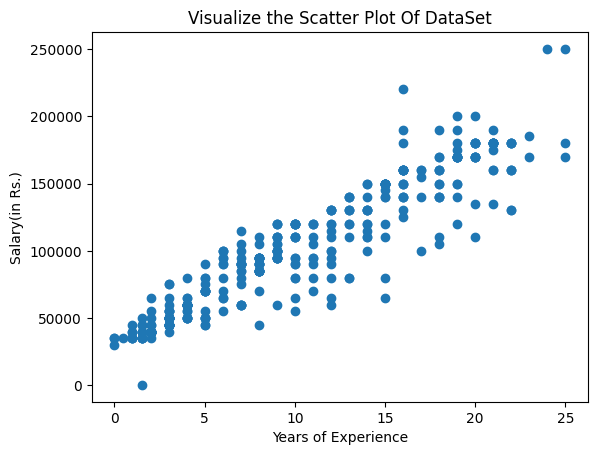

In [6]:
plt.scatter(data['Years of Experience'],data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary(in Rs.)')
plt.title('Visualize the Scatter Plot Of DataSet')

### Check Missing Value

In [7]:
data.isnull().sum()

Years of Experience    2
Salary                 2
dtype: int64

### Fill missing values with the mean

In [8]:
data['Years of Experience'].fillna(data['Years of Experience'].mean(), inplace=True)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)
# Display the DataFrame after filling missing values
data.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


### After Filling missing values check 

In [9]:
data.isnull().sum()

Years of Experience    0
Salary                 0
dtype: int64

## (4). Split the dataset into training and testing sets

In [10]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,Years of Experience
193,7.0
75,10.0
84,2.0
363,5.0
16,7.0


## (5). Create Custom Linear Regression

In [13]:
class CustomLinearRegression:
    def __init__(self):
        self.coefficients = None
    
    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        
        # Calculate coefficients using the normal equation
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        
        # Make predictions
        return X @ self.coefficients

## (6). Create Object(Call and assign into a Variable name model)

In [14]:
model = CustomLinearRegression()

## (7). fit the model

In [15]:
model.fit(X_train, y_train)

## (8). Predict on the test set

In [16]:
y_pred = model.predict(X_test)

## (9). Evaluate the model using Mean Squared Error (MSE)

In [17]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 254964921.790419


## (10). Calculate R-squared

In [18]:
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

# Calculate R-squared for the test set
r2 = r_squared(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.8947512075775288


### Print slope (coefficients) and intercept

In [19]:
print("Intercept:", model.coefficients[0])
print("Slope (Coefficient for Years of Experience):", model.coefficients[1])

Intercept: 31440.444847862185
Slope (Coefficient for Years of Experience): 6828.5989622704765


## (11). Predict the salary for new year of experience

In [20]:
# Define the new year of experience
new_experience = 10.0

# Predict the salary
predicted_salary = model.predict(np.array([[new_experience]]))

print("Predicted salary for {} years of experience: {:.2f}".format(new_experience, predicted_salary[0]))


Predicted salary for 10.0 years of experience: 99726.43


## Calculate and Check the predicted salary(Y)

In [21]:
# Given values ---> Y = mX + C
intercept = 31440.444847862185 # m
slope = 6828.5989622704765 # C
years_of_experience = 10.0 # X

# Calculate the predicted salary
predicted_salary = intercept + slope * years_of_experience

print("Predicted salary for {} years of experience: {:.2f}".format(years_of_experience, predicted_salary))


Predicted salary for 10.0 years of experience: 99726.43


## (12). Plotting and Visualize the Best Fit Line For Linear Regression Model

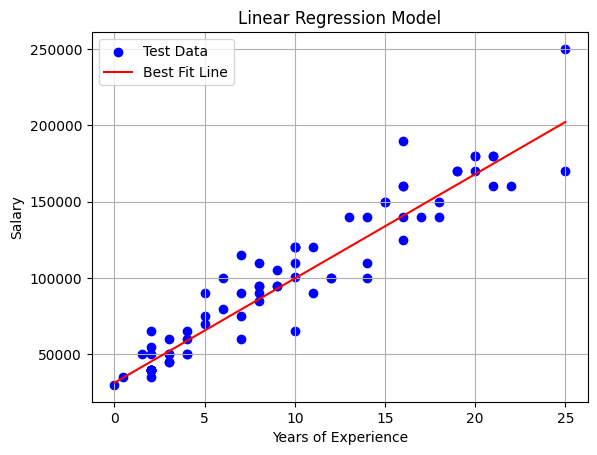

In [22]:
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plotting the best fit line
x_values = np.linspace(np.min(X_test), np.max(X_test), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', label='Best Fit Line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# ***********************************************************************

## Name - Aatish Kumar Baitha
  - M.Tech(Data Science 2nd Year Student)
- My Linkedin Profile -
  - https://www.linkedin.com/in/aatish-kumar-baitha-ba9523191
- My Blog
  - https://computersciencedatascience.blogspot.com/
- My Github Profile
  - https://github.com/Aatishkb

# Thank you!